# Environment Setup

In [2]:
import os

workspace_root = os.environ["SELF_DRIVE_CARLA_WORKSPACE"]
project_workspace = os.path.join(workspace_root, "01-semantic-segmentation")

# Create dataset as csv

- Read all images and labels.

In [5]:
rgb_dir = os.path.join(project_workspace, "out_sem", "rgb")
sem_dir = os.path.join(project_workspace, "out_sem", "sem")

images = [f for f in os.listdir(rgb_dir) if f.endswith(".png") and not f.endswith("_flip.png")]

print(len(images))

52026


- Dump them into a csv file 
    - headers: image_path, label_path

In [6]:
import pandas as pd

data= {
    "image_path": [os.path.join("out_sem", "rgb", f) for f in images ],
    "label_path": [os.path.join("out_sem", "sem", f) for f in images ],
}
df = pd.DataFrame(data)

df.to_csv(os.path.join(project_workspace, "dataset_no_flip.csv"), index=False)

# [GUIDE]  How to reduce dataset

In [3]:
import pandas as pd

in_pth= os.path.join(project_workspace, "dataset_no_flip.csv")
out_pth = os.path.join(project_workspace, "reduced_dataset.csv")

df = pd.read_csv(in_pth, nrows=None)

mask = [i < 1000 for i in range(len(df))]
sampled_df = df[mask]
sampled_df.to_csv(out_pth, index=False)

# Data Analysis

1. Load Data

In [12]:
from src.segmentation_dataset import SegmentationDataset

dataset = SegmentationDataset(os.path.join(project_workspace, "reduced_dataset.csv"), project_workspace)

In [13]:
import torch
from torch.utils.data import DataLoader
from src.labels import trainId2label

# Increase the batch size if your GPU memory allows
data_loader = DataLoader(dataset, batch_size=256, shuffle=False)

class_distribution = torch.zeros(len(trainId2label), dtype=torch.int64).cuda()

for batch, (_, labels) in enumerate(data_loader):
    labels = labels.cuda().view(-1)  # Use non_blocking=True for asynchronous transfer
    counts = torch.bincount(labels)
    class_distribution[:counts.size(0)] += counts
    print(f"Batch {batch} done")

class_distribution = class_distribution.cpu()

class_distribution = {trainId2label[i].name: count.item() for i, count in enumerate(class_distribution)}

Batch 0 done
Batch 1 done
Batch 2 done
Batch 3 done
Batch 4 done
Batch 5 done
Batch 6 done
Batch 7 done
Batch 8 done
Batch 9 done
Batch 10 done
Batch 11 done
Batch 12 done
Batch 13 done
Batch 14 done
Batch 15 done
Batch 16 done
Batch 17 done
Batch 18 done
Batch 19 done


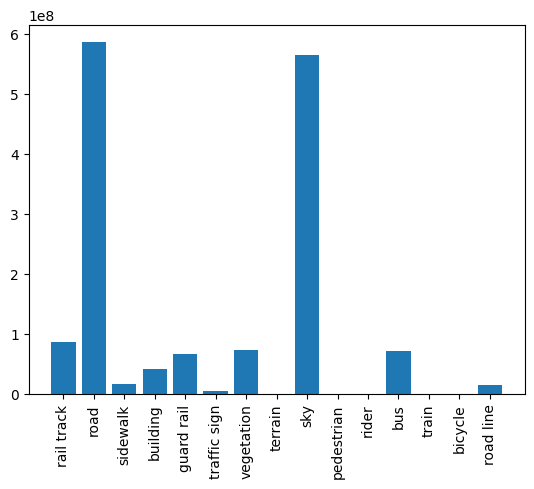

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(class_distribution.keys(), class_distribution.values())
plt.xticks(rotation=90)
plt.show()
